## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [1099]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [1100]:
df = pd.read_csv('https://raw.githubusercontent.com/feliciastevany/DataMiningW2/refs/heads/main/property_dataset.csv')
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [1101]:
df.describe()

# The table shows property statistics for 307 homes. On average, the land area is 226.91 m² (ranging from 14 m² to 1,561 m²), and the building area is 266.58 m²
#  (14 m² to 1,200 m²). Most properties have 3-5 bedrooms (average 4.28) and 2-4 bathrooms (average 3.34). Homes typically have 1-2 floors (average 1.86),
# with a maximum of 4 floors. This reflects a mix of small to large properties.

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [1102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [1103]:
missing_values = df.isnull().sum()
missing_values

# There are still null values on every columns.

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [1104]:
# Total number of rows
total_rows = len(df)

# Percentage of null values for each column
null_percentage = (df.isnull().sum() / total_rows) * 100
null_percentage

# To see the percentage, we must divided the null values by the total number of rows

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [1105]:
# Apply SimpleImputer to change the null values with 'most_frequent' value
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Ensure the datatypes are preserved
df_imputed = df_imputed.convert_dtypes()
for column in df_imputed.select_dtypes(include='number').columns:
    df_imputed[column] = df_imputed[column].astype(float)

df_imputed.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [1106]:
# Check if all missing values are filled
missing_values = df_imputed.isnull().sum()
missing_values

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [1107]:
df_imputed = df_imputed.drop('Nama Daerah', axis=1)
df_imputed.head(5)

# Since all the values are different, we need to drop 'Nama Daerah' Column

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [1108]:
encoder = LabelEncoder() # create a LabelEncoder to encode the categorical columns

# Define the mapping
area_category_mapping = { "Standard": 3, "Below Standard": 4, "Sangat Premium": 1, "Premium": 2 }
terjual_mapping = { "Belum": 1 }
ROW_mapping = { "< 1 Mobil": 1, "1-2 Mobil": 2, "> 2 Mobil": 3 }

# apply label encoding to the column
df_imputed['Area Category'] = df_imputed['Area Category'].map(area_category_mapping)
df_imputed['Terjual/Belum'] = df_imputed['Terjual/Belum'].map(terjual_mapping)
df_imputed['Arah Hadap Rumah'] = encoder.fit_transform(df_imputed['Arah Hadap Rumah'])
df_imputed['Posisi Rumah'] = encoder.fit_transform(df_imputed['Posisi Rumah'])
df_imputed['Lebar Jalan Depan Rumah (ROW)'] = df_imputed['Lebar Jalan Depan Rumah (ROW)'].map(ROW_mapping)

df_imputed.head(5) # showing 5 head encoded columns

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [1109]:
# Replace empty values with "10500000000"
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")

# Remove commas and periods from the string, then convert to numeric (int or float)
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].str.replace('.', '').str.replace(',', '').astype(object)

check the data type

In [1110]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  308 non-null    int64  
 1   Luas Tanah (m2)                308 non-null    float64
 2   Luas Bangunan (m2)             308 non-null    float64
 3   Jumlah Kamar                   308 non-null    float64
 4   Jumlah Kamar Mandi             308 non-null    float64
 5   Tingkat/Lantai                 308 non-null    float64
 6   Harga Penawaran (dari Owner)   308 non-null    object 
 7   Terjual/Belum                  308 non-null    int64  
 8   Arah Hadap Rumah               308 non-null    int64  
 9   Posisi Rumah                   308 non-null    int64  
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [1111]:
# Convert float and object columns to int

for column in df_imputed.columns:
    if df_imputed[column].dtype == 'float':
        df_imputed[column] = df_imputed[column].round().astype(int)  # For float columns
    elif df_imputed[column].dtype == 'object':
        df_imputed[column] = df_imputed[column].astype(int)  # For object columns (containing numeric strings)

In [1112]:
df_imputed.info()
# Checking the info of each columns again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [1113]:
# scaling data

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

df_scaled.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.29845,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.29845,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.29845,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.29845,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.29845,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

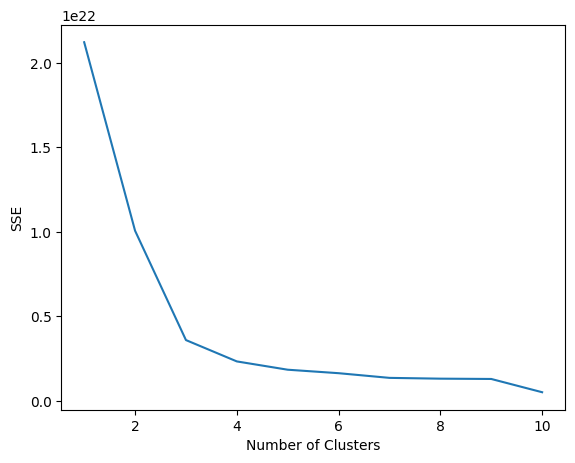

In [1114]:
# Initialize a list to store the WCSS values
wcss = []

# Compute KMeans for k values in range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_imputed)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(6.5, 5))
plt.plot(range(1, 11), wcss, linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [1115]:
# To find the best clusters for the model
findknee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
best_k = findknee.knee

print(f"The best k for you model is {best_k}")

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [1116]:
# Apply K-Means with the best number of clusters (based on the result above = 3)
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state=42)
y_predK = kmeans.fit_predict(df_scaled)

In [1117]:
df_scaled= pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_imputed['KMeans'] = y_predK

df_scaled.head(5)
# Inverse transform the scaled data to get the original values

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [1118]:
# aggregation
# Initialize an empty dictionary to hold the summaries
cluster_summary = df_imputed.groupby(y_predK).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

cluster_summary = cluster_summary.rename_axis("KMeans")
transpose_cluster_summary = cluster_summary.T

new_columns = [f"Cluster {col}" for col in transpose_cluster_summary.columns]
transpose_cluster_summary.columns = pd.Index(new_columns, name="KMeans")

transpose_cluster_summary

KMeans                                 Cluster 0     Cluster 1     Cluster 2
Area Category                 mode  2.000000e+00  1.000000e+00  3.000000e+00
                              min   1.000000e+00  1.000000e+00  2.000000e+00
                              max   4.000000e+00  4.000000e+00  4.000000e+00
Luas Tanah (m2)               mean  1.874586e+02  5.706800e+02  1.181782e+02
                              min   5.000000e+01  2.400000e+02  1.400000e+01
                              max   5.250000e+02  1.561000e+03  4.950000e+02
Luas Bangunan (m2)            mean  2.434076e+02  6.422200e+02  1.169703e+02
                              min   7.500000e+01  3.500000e+02  1.400000e+01
                              max   6.000000e+02  1.200000e+03  4.950000e+02
Jumlah Kamar                  mode  4.000000e+00  5.000000e+00  2.000000e+00
                              min   3.000000e+00  3.000000e+00  1.000000e+00
                              max   9.000000e+00  1.300000e+01  5.000000e+00
Jumlah Kamar Mandi            mode  4.000000e+00  5.000000e+00  2.000000e+00
                              min   1.000000e+00  2.000000e+00  1.000000e+00
                              max   7.000000e+00  1.300000e+01  4.000000e+00
Tingkat/Lantai                mode  2.000000e+00  2.000000e+00  2.000000e+00
                              min   1.000000e+00  1.000000e+00  1.000000e+00
                              max   3.000000e+00  4.000000e+00  2.000000e+00
Harga Penawaran (dari Owner)  mean  3.542674e+09  1.675630e+10  1.489009e+09
                              min   6.450000e+08  2.750000e+09  1.600000e+08
                              max   1.950000e+10  9.900000e+10  1.050000e+10
Terjual/Belum                 mode  1.000000e+00  1.000000e+00  1.000000e+00
Arah Hadap Rumah              mode  3.000000e+00  3.000000e+00  3.000000e+00
Posisi Rumah                  mode  2.000000e+00  2.000000e+00  2.000000e+00
Lebar Jalan Depan Rumah (ROW) mode  2.000000e+00  3.000000e+00  2.000000e+00

In [1119]:
# count data from each cluster
cluster_counts = df_imputed['KMeans'].value_counts().sort_index()
cluster_counts

,count
KMeans,
0,157
1,50
2,101


In [1120]:
# write down your interpretation from the cluster that you have been made
# Cluster 1: Represents luxurious, large properties with higher land/building sizes, more bedrooms/bathrooms, and premium prices. These are likely exclusive homes.
# Cluster 0: Represents medium-sized properties, targeting mid-tier buyers.
# Cluster 2: Represents smaller, affordable properties, likely catering to budget-conscious buyers or renters.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

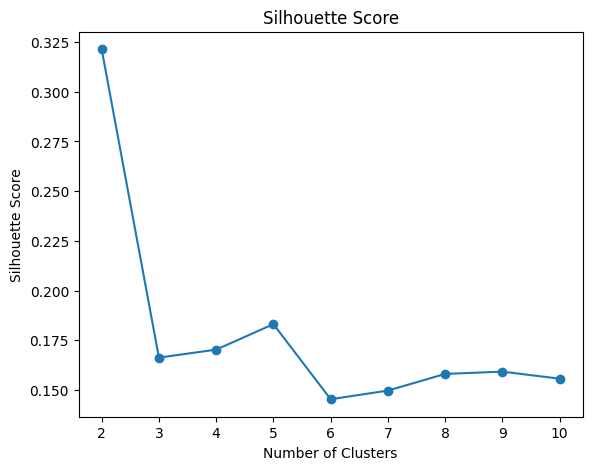

In [1121]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []
cluster_range = range(2, 11)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

for k in cluster_range:
    clustering_model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = clustering_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(6.5, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [1122]:
# agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_predA = agglomerative.fit_predict(df_scaled)

In [1123]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
#df_scaled = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_imputed['Agglo'] = y_predA

# show the df
df_imputed.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3,240,300,4,3,2,3500000000,1,3,2,2,0,1
1,4,30,60,2,1,2,287799000,1,3,2,1,2,2
2,3,170,170,5,4,2,2699999999,1,1,0,2,0,0
3,1,187,250,5,5,2,3100000000,1,3,2,2,0,0
4,2,350,600,5,5,2,5000000000,1,0,2,2,0,0


Display the cluster summary in the form of a dataframe.

In [1124]:
cluster_summary = df_imputed.groupby(y_predA).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis("Agglo")
cluster_summary

Area Category         Luas Tanah (m2)            Luas Bangunan (m2)  \
               mode min max            mean  min   max               mean   
Agglo                                                                       
0                 2   1   4      519.870968  170  1561         586.596774   
1                 2   1   4      172.512195   34   495         225.932927   
2                 3   2   4      114.353659   14   420         106.317073   

                 Jumlah Kamar         Jumlah Kamar Mandi          \
       min   max         mode min max               mode min max   
Agglo                                                              
0      170  1200            5   3  13                  5   2  13   
1       50   600            4   2   8                  4   1   7   
2       14   300            2   1   5                  1   1   4   

      Tingkat/Lantai           
                 mode min max  
Agglo                          
0                   2   1   4  
1                   2   1   3  
2                   1   1   2

In [1125]:
cluster_summary = df_imputed.groupby(y_predA).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

cluster_summary = cluster_summary.rename_axis("Agglo")
cluster_summary

Harga Penawaran (dari Owner)                          Terjual/Belum  \
                              mean         min          max          mode   
Agglo                                                                       
0                     1.454121e+10  2500000000  99000000000             1   
1                     3.150985e+09   325000000  14500000000             1   
2                     1.537662e+09   160000000  10500000000             1   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                          mode  
Agglo                                                              
0                    3            2                             2  
1                    3            2                             2  
2                    3            2                             2

In [1126]:
agglo_counts = df_imputed['Agglo'].value_counts().sort_index()
agglo_counts

,count
Agglo,
0,62
1,164
2,82


In [1127]:
# write down your interpretation from the cluster that you have been made
# Cluster 0: High-end, luxurious properties with large land/building sizes, more rooms, and premium prices. These are likely in exclusive areas.
# Cluster 1: Mid-tier properties offering a balance between size and price, targeting middle-class buyers.
# Cluster 2: Small, affordable homes, ideal for budget-conscious buyers or smaller households.

**Hierarchical Visualization**

Single Linkage

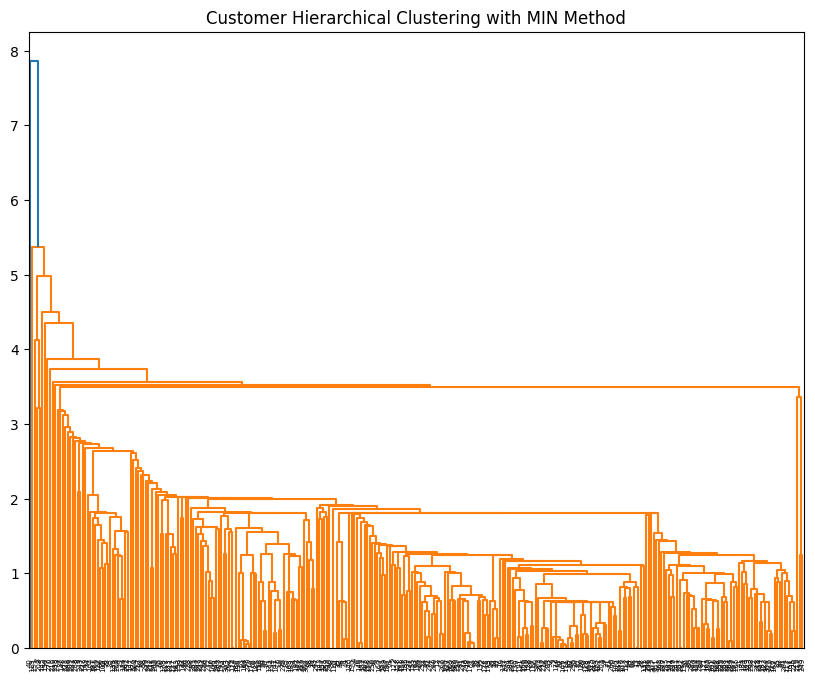

In [1128]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with MIN Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

complete linkage

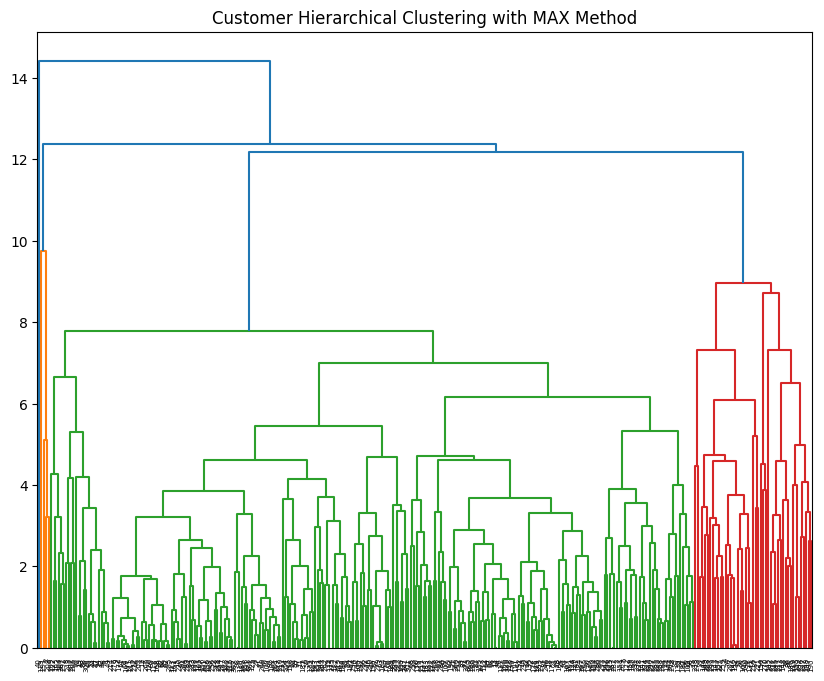

In [1129]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with MAX Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

average linkage

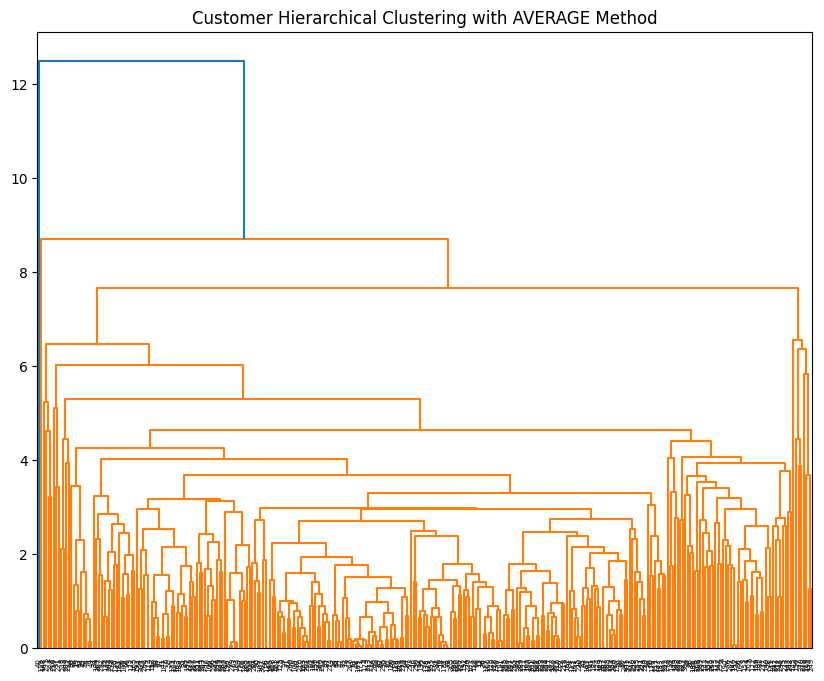

In [1130]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

ward method

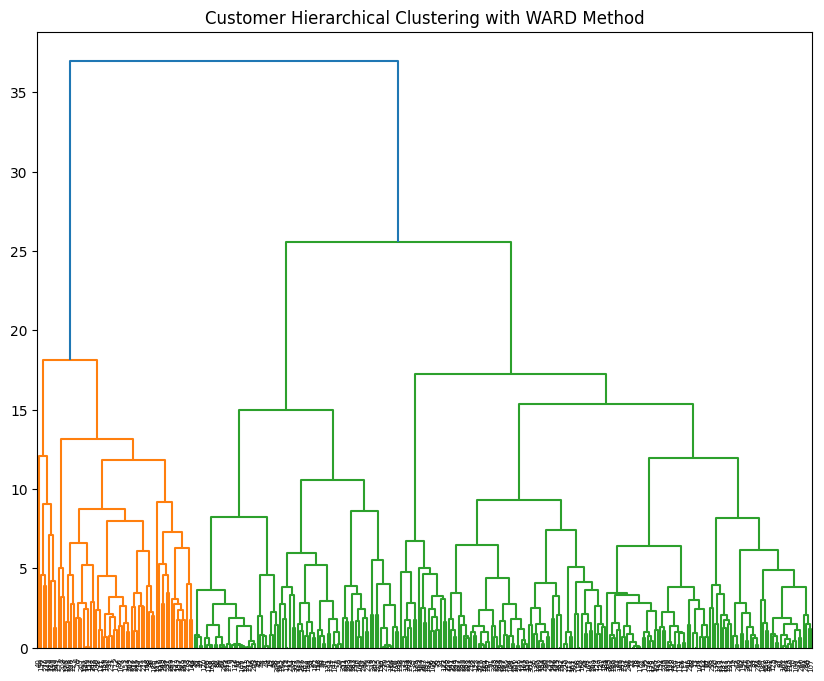

In [1131]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()